# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set For Q1-2
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

## About the Data Set For Q3
In this problem, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.


### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points in total)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

In [3]:
# For question 1.1
dataset = pd.read_csv("Dry_Beans_Dataset.csv")

print("Dataset :")
print(dataset.head())
print("Class : ")
print(dataset['Class'].unique())

print("Dimensions of the dataset : ", dataset.shape)
print("Features of the dataset :")
print(dataset.describe(include = 'all'))

Dataset :
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  44830    814.955       320.731947       178.405838      1.797766   
1  33476    691.826       258.837971       165.220760      1.566619   
2  27057    606.138       227.460904       151.860320      1.497830   
3  49483    844.283       326.602913       194.689529      1.677558   
4  22461    544.584       192.801303       148.541136      1.297966   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.831018       45297     238.912806  0.658877  0.989690   0.848226   
1      0.769773       33907     206.453305  0.721155  0.987289   0.878921   
2      0.744491       27358     185.607226  0.801831  0.988998   0.925436   
3      0.802907       50289     251.005403  0.680179  0.983973   0.872348   
4      0.637517       22699     169.110122  0.774731  0.989515   0.951720   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.744899      0.0071

In [4]:
dataset['Class']

0            SIRA
1        DERMASON
2        DERMASON
3            SIRA
4        DERMASON
           ...   
13606    DERMASON
13607      BOMBAY
13608        SIRA
13609       HOROZ
13610        SIRA
Name: Class, Length: 13611, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

X = dataset.drop('Class', axis = 1)
y = dataset['Class']

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y = pd.get_dummies(y)

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

#splitting data into ratio 80:20
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)

# Number of nodes in each hidden layer should be (10, 2)
# Learning rate should be 0.4
# Number of epochs should be 600
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
mlp

Pre-processed data :
           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      0.104229   0.198694         0.246967         0.165518      0.549934   
1      0.055748   0.114396         0.135499         0.126473      0.385468   
2      0.028340   0.055731         0.078990         0.086908      0.336523   
3      0.124097   0.218773         0.257541         0.213740      0.464403   
4      0.008715   0.013589         0.016569         0.077079      0.194315   
...         ...        ...              ...              ...           ...   
13606  0.083417   0.150914         0.162566         0.189677      0.315266   
13607  0.646868   0.733202         0.747292         0.728031      0.426928   
13608  0.118900   0.200327         0.218063         0.236224      0.342497   
13609  0.097606   0.217940         0.274969         0.124833      0.723842   
13610  0.112880   0.194735         0.214304         0.223307      0.358612   

       Eccentricity  ConvexArea  EquivDiam

MLPClassifier(activation='logistic', batch_size=100, hidden_layer_sizes=(12, 3),
              learning_rate_init=0.3, max_iter=500, random_state=42,
              solver='sgd')

In [6]:
y = dataset['Class']
y = pd.get_dummies(y)

In [7]:
mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred
#prediction on the test data. species are represented using the hot-keys

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
cm = multilabel_confusion_matrix(class_test, pred)
print(cm)

print("Classification Report : ")
print(classification_report(class_test, pred, zero_division = 1))

Accuracy :  0.8979441997063142
Mean Square Error :  0.02433396265995385
[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]]
Confusion Matrix for each label : 
[[[1220   14]
  [  17  111]]

 [[1315    0]
  [   1   46]]

 [[1189   10]
  [  19  144]]

 [[ 993   25]
  [  31  313]]

 [[1149    8]
  [  15  190]]

 [[1129   15]
  [  10  208]]

 [[1067   38]
  [  29  228]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       128
           1       1.00      0.98      0.99        47
           2       0.94      0.88      0.91       163
           3       0.93      0.91      0.92       344
           4       0.96      0.93      0.94       205
           5       0.93      0.95      0.94       218
           6       0.86      0.89      0.87       257

   micro avg       0.92      0.91      0.91      1362
   macro avg       0.93      0.92      0.92      1362
weighted avg       0.92      0

#### Confusion Matrix
<img src="./matrix.png" style="width:200px;height:200px"/> 

## Exercise 2 : k-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

In [9]:
# To find list of accuracy and MSE values
# Without using the sklearn function cross_validate()

from sklearn.model_selection import KFold

n_splits=10
# step 1: randomize the dataset and create k equal size partitions
kf = KFold(n_splits=n_splits)

acc = 0
mse = 0

i = 0 #keep track of batch number
# step 5: iterate k times with a different testing subset
for train_indices, test_indices in kf.split(X):

    # step 2-3: use k-1/k^th partition for the training/testing model
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    # perform the training similar to Q1
    #this was based on the requirements in Q1
    mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])
    
    # step 4: record the evaluating scores
    i+=1
    acc += accuracy_score(y[start_test:stop_test], pred)
    mse += mean_squared_error(y[start_test:stop_test], pred)
    
    print("\nAccuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))

# step 6: find the average and select the batch with highest evaluation scores
print('\nAverage Accuracy = ', acc / n_splits)
print('Average MSE = ', mse / n_splits)


Accuracy for batch  1  :  0.868575624082232
Mean Square Error for batch  1  :  0.026117054751415986

Accuracy for batch  2  :  0.9096252755326966
Mean Square Error for batch  2  :  0.020258213498478006

Accuracy for batch  3  :  0.9074210139603233
Mean Square Error for batch  3  :  0.021937650886952872

Accuracy for batch  4  :  0.9066862601028656
Mean Square Error for batch  4  :  0.02183268605017319

Accuracy for batch  5  :  0.9177075679647319
Mean Square Error for batch  5  :  0.019838354151359296

Accuracy for batch  6  :  0.9059515062454078
Mean Square Error for batch  6  :  0.022252545397291906

Accuracy for batch  7  :  0.9110947832476121
Mean Square Error for batch  7  :  0.021727721213393513

Accuracy for batch  8  :  0.9191770756796473
Mean Square Error for batch  8  :  0.02015324866169833

Accuracy for batch  9  :  0.8978692138133725
Mean Square Error for batch  9  :  0.023931982785766772

Accuracy for batch  10  :  0.9000734753857458
Mean Square Error for batch  10  :  0.

## Exercise 3 - Logistic Regression (20 points in total)
Recall the dataset from last week homework

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [11]:
df = pd.read_csv('./auto-mpg.csv')

data = df.copy().loc[(df['origin'] != 'Europe'), :]
train, test = train_test_split(data, test_size=0.2, random_state=21)
# The remaining
X_train, y_train = train.drop(columns=['origin']) ,train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']

### Exercise 3.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [12]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



If we want to distinguish between Japan and Europe, the accuracy will decrease. The logistic regression is for the model to find the distinction between data. If data points from different categorical values are more separated, then logistic regression will perform better than they did for data points which are overlapping with each other. When we refer to the pairplot of exercise 1, we can find the green dots which represents Europe and orange plot which represents Japan are overlapping with each other. Therefore, it will be difficult for logistic regression to distinguish those points and the accuracy will decrease.

## Exercise 4 - Polynomial Regressor using Gradient Descent (20 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable cost, and the second column is the dependent variable production_output.

### Exercise 4.1 - Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

In [20]:
df = pd.read_csv('./cost.csv')
train, test = train_test_split(df, test_size=0.3, random_state=21)
X_train, y_train = train['production_output'], train['cost']
X_test, y_test  = test['production_output'], test['cost']
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

C:\Users\David\AppData\Local\Temp\ipykernel_3264\2849635894.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\David\AppData\Local\Temp\ipykernel_3264\2849635894.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:, np.newaxis]
C:\Users\David\AppData\Local\Temp\ipykernel_3264\2849635894.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]
C:\Users\David\AppData\Local\Temp\ipykernel_3264\2849635894.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecat

### Exercise 4.2 - Polynomial Regression (15 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.

In [25]:
import matplotlib.pyplot as plt
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


Training RMSE: 301.847579681022978
Training R2: 0.660108476969875

Test RMSE: 572.965111937086363
Test R2: 0.515680036166109


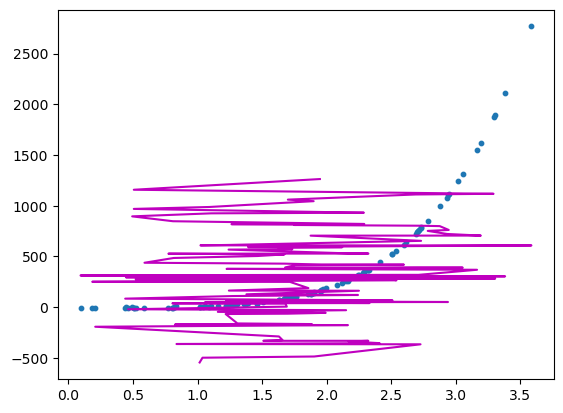

In [27]:
# For degree one, it is the same as linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(X_train, y_train, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(X_train, y_train_pred, color='m')
plt.show()